In [1]:
import pandas as pd  
import numpy as np
import re

In [2]:
def from_data_to_node_entities(input_file):
    INPUT_FOLDER = "ekg_enrichment/"
    data = pd.read_csv(INPUT_FOLDER+input_file,sep=",",encoding="latin1").fillna(method='ffill')    
    data_l = data.values.tolist()
    node_entities=[]
    all_entities = []

    for row in data_l:
        ent = row[1]
        ent = ent.replace("'","")
        ent = ent.replace("[","")
        ent = ent.replace("]","")
        ent = ent.replace(" sap","sap")
        ent_s = ent.split(',')
        #print(ent_s)

        ent_list =[]
        for e in ent_s:
            if len(e)>0:
                ent_list.append(e)
                all_entities.append(e)

        ent_list = sorted(set(ent_list))

        for i in ent_list:
            new_line =[]
            new_line.append(row[0])
            new_line.append(i)
            node_entities.append(new_line)

    all_entities = sorted(set(all_entities))
    
    return node_entities, all_entities

## Execution for each data file:

In [3]:
# INPUT_FOLDER = "ekg_enrichment/"
input_file = "final_id_entities_1_1000_nodes.csv"

node_entities_1, all_entities_1 = from_data_to_node_entities(input_file)
print(len(node_entities_1))
print(len(all_entities_1))

152
34


In [4]:
input_file = "final_id_entities_1000_2000_nodes.csv"

node_entities_2, all_entities_2 = from_data_to_node_entities(input_file)
print(len(node_entities_2))
print(len(all_entities_2))

171
33


In [5]:
input_file = "final_id_entities_2000_3000_nodes.csv"

node_entities_3, all_entities_3 = from_data_to_node_entities(input_file)
print(len(node_entities_3))
print(len(all_entities_3))

204
32


In [6]:
input_file = "final_id_entities_3000_4000_nodes.csv"

node_entities_4, all_entities_4 = from_data_to_node_entities(input_file)
print(len(node_entities_4))
print(len(all_entities_4))

148
31


In [7]:
input_file = "final_id_entities_4000_5000_nodes.csv"

node_entities_5, all_entities_5 = from_data_to_node_entities(input_file)
print(len(node_entities_5))
print(len(all_entities_5))

141
32


In [8]:
node_entities = node_entities_1 + node_entities_2 + node_entities_3 + node_entities_4 + node_entities_5
len(node_entities)

816

### Output 1: List containing all entities ('all_entities')

In [9]:
all_entities = all_entities_1 + all_entities_2 + all_entities_3 + all_entities_4 + all_entities_5
print(len(all_entities))
all_entities = sorted(set(all_entities))
print(len(all_entities))

162
64


In [10]:
all_entities

['sap analytics cloud',
 'sap appcenter',
 'sap ariba',
 'sap ase',
 'sap asset manager',
 'sap banking',
 'sap business bydesign',
 'sap business in focus',
 'sap business intelligence',
 'sap business objects',
 'sap business suite',
 'sap business warehouse',
 'sap bydesign',
 'sap caf',
 'sap capital yield',
 'sap car',
 'sap cloud application lifecycle management',
 'sap cloud connector',
 'sap cloud foundry',
 'sap cloud identity',
 'sap cloud platform',
 'sap cloud platform integration',
 'sap crystal reports',
 'sap customer activity repository',
 'sap customer engagement center',
 'sap customer relationship management',
 'sap data hub',
 'sap data services',
 'sap data warehouse cloud',
 'sap digital manufacturing insights',
 'sap ea designer',
 'sap ecc',
 'sap erp',
 'sap fieldglass',
 'sap financial consolidation',
 'sap financial information management',
 'sap fiori',
 'sap gateway',
 'sap group reporting data collection',
 'sap hana',
 'sap hana cloud',
 'sap hana cloud p

In [11]:
ent2idx = {t: i for i, t in enumerate(all_entities)}
idx2ent = {i: t for i, t in enumerate(all_entities) }
print(ent2idx)
print(idx2ent)

{'sap analytics cloud': 0, 'sap appcenter': 1, 'sap ariba': 2, 'sap ase': 3, 'sap asset manager': 4, 'sap banking': 5, 'sap business bydesign': 6, 'sap business in focus': 7, 'sap business intelligence': 8, 'sap business objects': 9, 'sap business suite': 10, 'sap business warehouse': 11, 'sap bydesign': 12, 'sap caf': 13, 'sap capital yield': 14, 'sap car': 15, 'sap cloud application lifecycle management': 16, 'sap cloud connector': 17, 'sap cloud foundry': 18, 'sap cloud identity': 19, 'sap cloud platform': 20, 'sap cloud platform integration': 21, 'sap crystal reports': 22, 'sap customer activity repository': 23, 'sap customer engagement center': 24, 'sap customer relationship management': 25, 'sap data hub': 26, 'sap data services': 27, 'sap data warehouse cloud': 28, 'sap digital manufacturing insights': 29, 'sap ea designer': 30, 'sap ecc': 31, 'sap erp': 32, 'sap fieldglass': 33, 'sap financial consolidation': 34, 'sap financial information management': 35, 'sap fiori': 36, 'sap

### Output 2: List containing all node-entity relations ('node_entities')

In [12]:
node_entities = sorted(node_entities)
node_entities[:10]

[[167184, 'sap cloud foundry'],
 [169134, 'sap ariba'],
 [169134, 'sap erp'],
 [169294, 'sap business warehouse'],
 [169294, 'sap hana'],
 [169294, 'sap netweaver'],
 [169451, 'sap business warehouse'],
 [169451, 'sap netweaver'],
 [171807, 'sap ecc'],
 [171807, 'sap solution manager']]

In [13]:
node_entities_rels=[]

for ne in node_entities:
    node_id = ne[0]
    entity = ne[1]
    
    new_line = []
    new_line.append(node_id)
    new_line.append(entity)
    new_line.append('CONTAINS_PRODUCT')
    node_entities_rels.append(new_line)
    
node_entities_rels[:10]

[[167184, 'sap cloud foundry', 'CONTAINS_PRODUCT'],
 [169134, 'sap ariba', 'CONTAINS_PRODUCT'],
 [169134, 'sap erp', 'CONTAINS_PRODUCT'],
 [169294, 'sap business warehouse', 'CONTAINS_PRODUCT'],
 [169294, 'sap hana', 'CONTAINS_PRODUCT'],
 [169294, 'sap netweaver', 'CONTAINS_PRODUCT'],
 [169451, 'sap business warehouse', 'CONTAINS_PRODUCT'],
 [169451, 'sap netweaver', 'CONTAINS_PRODUCT'],
 [171807, 'sap ecc', 'CONTAINS_PRODUCT'],
 [171807, 'sap solution manager', 'CONTAINS_PRODUCT']]

In [14]:
node_entities_rels

[[167184, 'sap cloud foundry', 'CONTAINS_PRODUCT'],
 [169134, 'sap ariba', 'CONTAINS_PRODUCT'],
 [169134, 'sap erp', 'CONTAINS_PRODUCT'],
 [169294, 'sap business warehouse', 'CONTAINS_PRODUCT'],
 [169294, 'sap hana', 'CONTAINS_PRODUCT'],
 [169294, 'sap netweaver', 'CONTAINS_PRODUCT'],
 [169451, 'sap business warehouse', 'CONTAINS_PRODUCT'],
 [169451, 'sap netweaver', 'CONTAINS_PRODUCT'],
 [171807, 'sap ecc', 'CONTAINS_PRODUCT'],
 [171807, 'sap solution manager', 'CONTAINS_PRODUCT'],
 [189302, 'sap fiori', 'CONTAINS_PRODUCT'],
 [189302, 'sap hana cloud platform', 'CONTAINS_PRODUCT'],
 [196401, 'sap cloud platform', 'CONTAINS_PRODUCT'],
 [205373, 'sap business objects', 'CONTAINS_PRODUCT'],
 [206309, 'sap netweaver', 'CONTAINS_PRODUCT'],
 [207967, 'sap cloud platform', 'CONTAINS_PRODUCT'],
 [207967, 'sap erp', 'CONTAINS_PRODUCT'],
 [207967, 'sap fiori', 'CONTAINS_PRODUCT'],
 [207967, 'sap hana', 'CONTAINS_PRODUCT'],
 [214111, 'sap ariba', 'CONTAINS_PRODUCT'],
 [219215, 'sap crystal repor

#### Replace Entities by IDs:

In [15]:
node_entities_ids=[]

for i in node_entities:
    node_id = i[0]
    entity = i[1]
    entity_id = ent2idx.get(entity)
    new_line = []
    new_line.append(node_id)
    new_line.append(entity_id)
    new_line.append('CONTAINS_PRODUCT')
    node_entities_ids.append(new_line)
    
node_entities_ids[:10]

[[167184, 18, 'CONTAINS_PRODUCT'],
 [169134, 2, 'CONTAINS_PRODUCT'],
 [169134, 32, 'CONTAINS_PRODUCT'],
 [169294, 11, 'CONTAINS_PRODUCT'],
 [169294, 39, 'CONTAINS_PRODUCT'],
 [169294, 54, 'CONTAINS_PRODUCT'],
 [169451, 11, 'CONTAINS_PRODUCT'],
 [169451, 54, 'CONTAINS_PRODUCT'],
 [171807, 31, 'CONTAINS_PRODUCT'],
 [171807, 60, 'CONTAINS_PRODUCT']]

In [16]:
# node_entities_ids

# Build a Knowledge Graph from the Entity Pairs:

In [17]:
# extract source
source = [i[0] for i in node_entities_ids]

# extract target
target = [i[1] for i in node_entities_ids]

# extract relationship
relations = [i[2] for i in node_entities_ids]

kg_df = pd.DataFrame({'source':source, 'target':target, 'edge':relations})

In [18]:
# create a directed-graph from a dataframe
import networkx as nx
G=nx.from_pandas_edgelist(kg_df, "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

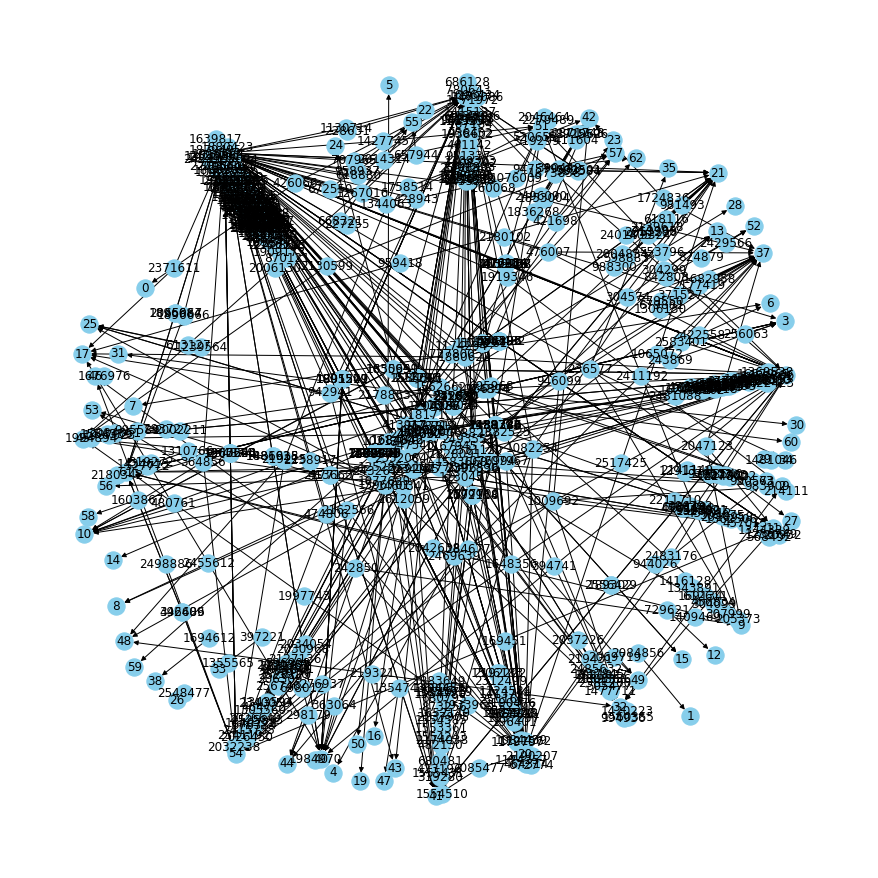

In [19]:
# Let's plot the network:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,12))

pos = nx.spring_layout(G)
nx.draw(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

### Build Graph: NodeID-EntityName:

#### a) Graph Type: MultiDiGraph—Directed graphs with self loops and parallel edges

In [20]:
# extract source
source2 = [i[0] for i in node_entities_rels]

# extract target
target2 = [i[1] for i in node_entities_rels]

# extract relationship
relations2 = [i[2] for i in node_entities_rels]

kg_df2 = pd.DataFrame({'source':source2, 'target':target2, 'edge':relations2})

In [21]:
# create a directed-graph from a dataframe
import networkx as nx
G2=nx.from_pandas_edgelist(kg_df2, "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

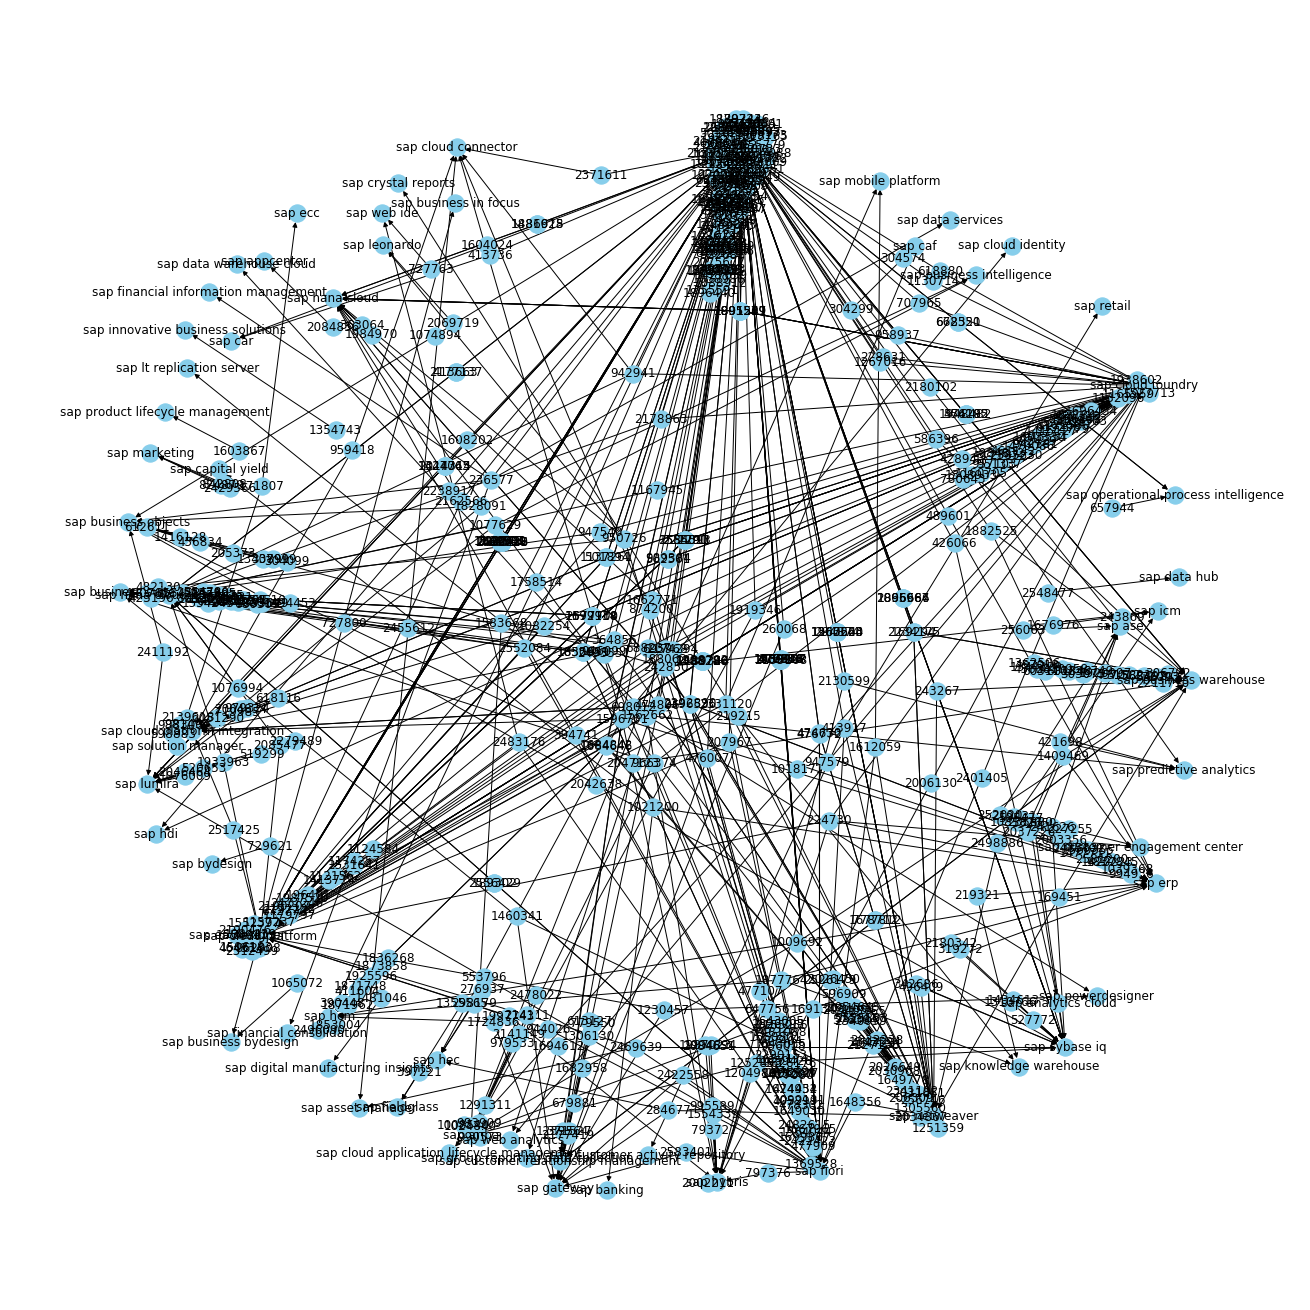

In [22]:
# Let's plot the network:
import matplotlib.pyplot as plt

plt.figure(figsize=(18,18))

pos = nx.spring_layout(G2)
# pos = nx.circular_layout(G2)
# pos = nx.kamada_kawai_layout(G2)

nx.draw(G2, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

#### b) Graph Type: Graph—Undirected graphs with self loops

In [23]:
# extract source
source2 = [i[0] for i in node_entities_rels]

# extract target
target2 = [i[1] for i in node_entities_rels]

# extract relationship
relations2 = [i[2] for i in node_entities_rels]

kg_df2 = pd.DataFrame({'source':source2, 'target':target2, 'edge':relations2})

In [24]:
# create a directed-graph from a dataframe
import networkx as nx
G2=nx.from_pandas_edgelist(kg_df2, "source", "target", 
                          edge_attr=True, create_using=nx.Graph())

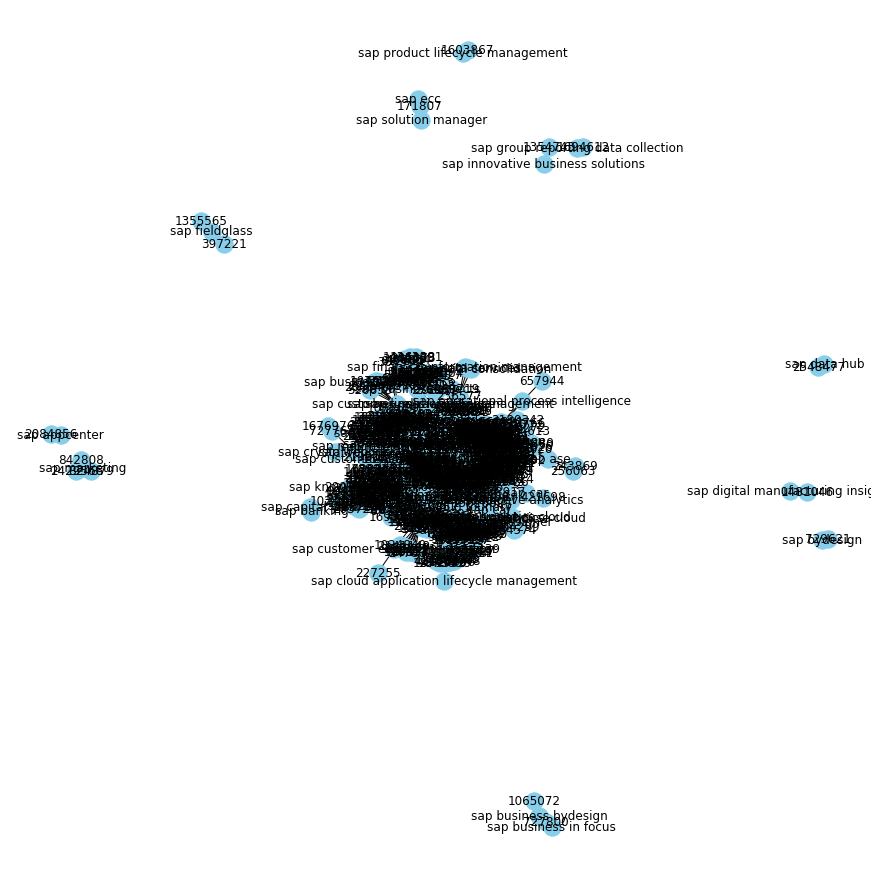

In [25]:
# Let's plot the network:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,12))

pos = nx.spring_layout(G2)
# pos = nx.circular_layout(G2)
# pos = nx.kamada_kawai_layout(G2)

nx.draw(G2, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

In [26]:
# In case we wanted to filter the visualization by just one relationship type:

# G3=nx.from_pandas_edgelist(kg_df2[kg_df2['edge']=="CONTAINS_PRODUCT"], "source", "target", 
#                           edge_attr=True, create_using=nx.MultiDiGraph())

# plt.figure(figsize=(12,12))
# pos = nx.spring_layout(G3, k = 0.5) # k regulates the distance between nodes
# nx.draw(G3, with_labels=True, node_color='skyblue', node_size=1500, edge_cmap=plt.cm.Blues, pos = pos)
# plt.show()

### Future work: add weights to the graph relationships:
Assign edge weights to a networkx graph using pandas dataframe
https://stackoverflow.com/questions/52400380/assign-edge-weights-to-a-networkx-graph-using-pandas-dataframe
Other related code:
https://www.programcreek.com/python/example/120151/networkx.from_pandas_edgelist
https://www.python-graph-gallery.com/321-custom-networkx-graph-appearance
http://jonathansoma.com/lede/algorithms-2017/classes/networks/networkx-graphs-from-source-target-dataframe/

# RANDOM WALK x node embeddings

In [27]:
import networkx as nx
import pandas as pd
import numpy as np
import random
from tqdm import tqdm
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
!pip install -U gensim

Requirement already up-to-date: gensim in /opt/conda/lib/python3.7/site-packages (4.0.1)


In [29]:
def get_randomwalk(node, path_length):
    import random
    
    random_walk = [node]
    
    for i in range(path_length-1):
        temp = list(G2.neighbors(node))
        temp = list(set(temp) - set(random_walk))    
        if len(temp) == 0:
            break

        random_node = random.choice(temp)
        random_walk.append(random_node)
        node = random_node
        
    return random_walk

Let’s try out this function for the node 'sap hana'

In [30]:
get_randomwalk(169294, 10)

[169294, 'sap business warehouse', 2211710]

In [31]:
get_randomwalk('sap hana', 20)

['sap hana', 1891856]

Capture the random walks for all nodes in your dataset (walk length = 10):

In [32]:
# get list of all nodes from the graph
walk_length=10

all_nodes = list(G2.nodes())

random_walks = []
for n in tqdm(all_nodes):
    for i in range(5):
        random_walks.append(get_randomwalk(n,walk_length))
        
# count of sequences
nr_of_walks=len(random_walks)

str1 = str(walk_length)
str2 = str(nr_of_walks)

print('With the traverse length set to '+str1+', we have got '+str2+' random walk sequences of nodes.')

100%|██████████| 587/587 [00:00<00:00, 9157.15it/s]

With the traverse length set to 10, we have got 2935 random walk sequences of nodes.


# Deep Walk: Train node embeddings model

In [33]:
import gensim
from gensim.models import Word2Vec

import warnings
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.7/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [34]:
# train skip-gram (word2vec) model
model = Word2Vec(window = 4, sg = 1, hs = 0,
                 negative = 10, # for negative sampling
                 alpha=0.03, min_alpha=0.0007,
                 seed = 14)

model.build_vocab(random_walks, progress_per=2)

model.train(random_walks, total_examples = model.corpus_count, epochs=20, report_delay=1)

(207109, 286280)

Now, every node in the graph is represented by a fixed length (100) vector.

In [35]:
vector = model.wv['sap hana'] 
vector

array([-0.23525347,  0.02780584,  0.0454677 , -0.45412278, -0.35551497,
        0.34437945, -0.25912544,  0.19701485, -0.28972745, -0.2635657 ,
       -0.5246886 ,  0.2658961 , -0.21658114,  0.08456253, -0.3167307 ,
        0.19334108,  0.00507976,  0.1491221 ,  0.15562853, -0.02409062,
        0.5857157 ,  0.38196248,  0.4762718 , -0.1729791 ,  0.10475568,
        0.19943565, -0.15466817,  0.536311  , -0.02416679, -0.32689843,
       -0.03839217, -0.2946107 ,  0.29128382, -0.02508666,  0.14562781,
        0.01282402,  0.12361804,  0.4305431 ,  0.22860697, -0.27996874,
        0.06213555,  0.37067908, -0.3150315 ,  0.08705018,  0.08030882,
        0.00082897,  0.11690807, -0.09478565, -0.04222024,  0.31714776,
        0.44170165, -0.3436023 ,  0.07198461, -0.22778831, -0.12661265,
        0.14061363, -0.09850647,  0.05468495, -0.19030051, -0.23696011,
        0.19045332,  0.45857915,  0.08322859, -0.07990258,  0.07849033,
       -0.36000046,  0.46384287,  0.08013405,  0.17725472,  0.19

### Finding similar nodes:

Let's find the most similar nodes to 'sap hana'

In [36]:
sims = model.wv.most_similar('sap hana', topn=5)  # get other similar words
sims

[(1434936, 0.618304431438446),
 (1896440, 0.6030522584915161),
 (1355591, 0.5973834991455078),
 (1427659, 0.5968478322029114),
 (1915524, 0.5876324772834778)]

In [37]:
sims = model.wv.most_similar(169294, topn=5)  # get other similar words
sims

[(169451, 0.8576145768165588),
 (1948482, 0.8258353471755981),
 (2234175, 0.8036444783210754),
 (536702, 0.7894158959388733),
 (1362506, 0.7859659790992737)]

In [38]:
# LOOKING INTO THE DETAILS OF THOSE 5 NODES:

169294	sap business warehouse	CONTAINS_PRODUCT
169294	sap hana	            CONTAINS_PRODUCT
169294	sap netweaver	        CONTAINS_PRODUCT

169451	sap business warehouse	CONTAINS_PRODUCT
169451	sap netweaver	        CONTAINS_PRODUCT
536702	sap business warehouse	CONTAINS_PRODUCT
1362506	sap business warehouse	CONTAINS_PRODUCT
1948482	sap business warehouse	CONTAINS_PRODUCT
1948482	sap hana	            CONTAINS_PRODUCT
2234175	sap business warehouse	CONTAINS_PRODUCT
2234175	sap hana	            CONTAINS_PRODUCT
2234175	sap netweaver	        CONTAINS_PRODUCT

SyntaxError: invalid syntax (<ipython-input-38-dce4438e3f01>, line 3)

457012	sap business warehouse	CONTAINS_PRODUCT
515821	sap business warehouse	CONTAINS_PRODUCT
601848	sap business warehouse	CONTAINS_PRODUCT
603110	sap business warehouse	CONTAINS_PRODUCT
1344329	sap business warehouse	CONTAINS_PRODUCT

Now, I want to see how well our node embeddings capture the similarity between different nodes. I have handpicked a few nodes from the graph and will plot them on a 2-dimensional space:

In [60]:
# terms = ['lunar escape systems','soviet moonshot', 'soyuz 7k-l1', 
#          'moon landing','space food', 'food systems on space exploration missions', 
#          'meal, ready-to-eat','space law', 'metalaw', 'moon treaty', 
#          'legal aspects of computing','astronaut training', 'reduced-gravity aircraft', 
#          'space adaptation syndrome', 'micro-g environment']

terms = ['sap cloud foundry', 'sap ariba', 'sap erp', 'sap business warehouse', 'sap hana', 
         'sap ecc', 'sap netweaver', 'sap solution manager', 'sap fiori', 'sap hana cloud platform', 
         'sap cloud platform', 'sap business objects', 'sap crystal reports', 
         'sap knowledge warehouse', 'sap hcm','sap hdi','sap lumira'] 

terms2 = ['sap analytics cloud',
 'sap appcenter',
 'sap ariba',
 'sap ase',
 'sap asset manager',
 'sap banking',
 'sap business bydesign',
 'sap business in focus',
 'sap business intelligence',
 'sap business objects',
 'sap business suite',
 'sap business warehouse',
 'sap business objects',
 'sap caf',
 'sap capital yield',
 'sap car',
 'sap cloud connector',
 'sap cloud foundry',
 'sap cloud identity',
 'sap cloud platform',
 'sap cloud platform integration',
 'sap customer relationship management',
 'sap crystal reports',
 'sap customer activity repository',
 'sap customer engagement center',
 'sap data hub',
 'sap data services',
 'sap data warehouse cloud',
 'sap digital manufacturing insights',
 'sap ea designer',
 'sap ecc',
 'sap erp',
 'sap fieldglass',
 'sap financial consolidation',
 'sap financial information management',
 'sap fiori',
 'sap gateway',
 'sap group reporting data collection',
 'sap hana',
 'sap hana cloud',
 'sap hana cloud platform',
 'sap hcm',
 'sap hdi',
 'sap hec',
 'sap hybris',
 'sap icm',
 'sap innovative business solutions',
 'sap knowledge warehouse',
 'sap leonardo',
 'sap lt replication server',
 'sap lumira',
 'sap marketing',
 'sap mobile platform',
 'sap netweaver',
 'sap operational process intelligence',
 'sap powerdesigner',
 'sap predictive analytics',
 'sap product lifecycle management',
 'sap retail',
 'sap solution manager',
 'sap sybase iq',
 'sap web analytics',
 'sap web ide']

terms3 = [167184,
169134,
169294,
169451,
171807,
189302,
196401,
205373,
206309,
207967,
214111,
219215,
219321,
219431,
219946,
221791,
221791,
222290,
223578,
224730,
227255,
228554,
228631,
235880,
236577]

In [85]:
terms4 = ['sap cloud foundry', 'sap cloud platform','sap ariba', 'sap erp', 'sap ecc', 'sap hcm','sap solution manager','sap business warehouse', 'sap hana', 'sap netweaver', 'sap fiori', 'sap hana cloud platform','sap hdi','sap lumira'] 
# terms4 = ['sap hana','sap ecc', 'sap erp']

In [46]:
X = model.wv[terms] 
X

array([[ 0.02547376,  0.44668582,  0.2903754 , ..., -0.2899662 ,
         0.28784624, -0.02178267],
       [ 0.02859526,  0.3139828 ,  0.04756661, ...,  0.25327381,
         0.92662936,  0.34318578],
       [ 0.25363302,  0.21463846, -0.21528837, ...,  0.28508666,
         0.68556607,  0.35554773],
       ...,
       [ 0.5301762 ,  0.17006686,  0.334295  , ...,  0.22989213,
         0.7298882 , -0.35788122],
       [ 0.12602045,  0.31906423,  0.02193769, ..., -0.23339504,
         0.7831501 ,  0.10155372],
       [-0.604638  , -0.35581917, -0.47874197, ...,  0.80242544,
         0.73033065, -0.23591767]], dtype=float32)

In [61]:
Y = model.wv[terms2] 
Y

array([[-0.28774875,  0.11967624,  0.25111645, ...,  0.04956261,
         0.28048635,  0.3826033 ],
       [ 0.01116295,  0.02619862, -0.04004798, ...,  0.09260204,
         0.18797563,  0.1116908 ],
       [ 0.02859526,  0.3139828 ,  0.04756661, ...,  0.25327381,
         0.92662936,  0.34318578],
       ...,
       [-0.05264755, -0.08250523,  0.01004755, ...,  0.15764375,
         0.2253938 ,  0.4290951 ],
       [ 0.13808957,  0.3653352 ,  0.45583022, ...,  0.0563652 ,
         0.02953001,  0.1560476 ],
       [ 0.35203782,  0.0812121 ,  0.5787311 , ...,  0.3585065 ,
        -0.20465751, -0.12363534]], dtype=float32)

In [62]:
Z = model.wv[terms3] 
Z

array([[-0.02290549,  0.31514773,  0.40856683, ...,  0.01195183,
         0.3219454 , -0.01558799],
       [ 0.05183652,  0.15534799,  0.01176085, ...,  0.04041597,
         0.78791684,  0.40844488],
       [-0.129211  ,  0.28723946,  0.0306046 , ..., -0.02598949,
         0.09623423,  0.34285176],
       ...,
       [ 0.14845881,  0.17215897,  0.3582477 , ...,  0.03139566,
         0.04195227, -0.0691567 ],
       [-0.2946238 , -0.22613154, -0.01184985, ..., -0.17357147,
         0.43618402,  0.3961786 ],
       [-0.12293537, -0.07927852, -0.6023702 , ...,  0.9782823 ,
         0.34313914, -0.15917468]], dtype=float32)

In [88]:
A = model.wv[terms4] 
A

array([[ 0.02547376,  0.44668582,  0.2903754 , ..., -0.2899662 ,
         0.28784624, -0.02178267],
       [ 0.16758694, -0.0470381 ,  0.29854664, ...,  0.123834  ,
        -0.00211695, -0.1898132 ],
       [ 0.02859526,  0.3139828 ,  0.04756661, ...,  0.25327381,
         0.92662936,  0.34318578],
       ...,
       [ 0.25924805, -0.01045807, -0.13018811, ...,  0.54913527,
         0.48267034, -0.16876309],
       [ 0.12602045,  0.31906423,  0.02193769, ..., -0.23339504,
         0.7831501 ,  0.10155372],
       [-0.604638  , -0.35581917, -0.47874197, ...,  0.80242544,
         0.73033065, -0.23591767]], dtype=float32)

Below I have defined a function that will plot the vectors of the selected nodes in a 2-dimensional space:

In [63]:
def plot_nodes(word_list, X):
    #X = model.vv[word_list]
    
    # reduce dimensions to 2
    pca = PCA(n_components=2)
    result = pca.fit_transform(X)
    
    
    plt.figure(figsize=(12,9))
    # create a scatter plot of the projection
    plt.scatter(result[:, 0], result[:, 1])
    for i, word in enumerate(word_list):
        plt.annotate(word, xy=(result[i, 0], result[i, 1]))
        
    plt.show()

Let's plot the selected nodes:

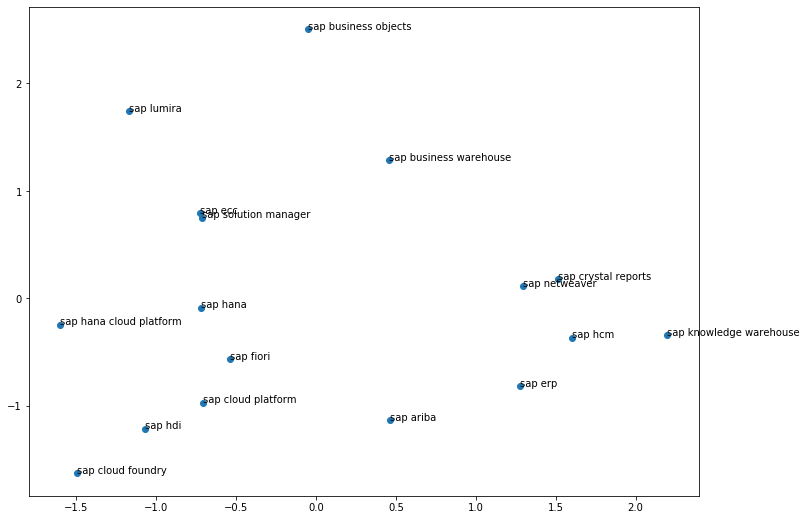

In [64]:
plot_nodes(terms, X)

IndexError: index 14 is out of bounds for axis 0 with size 14

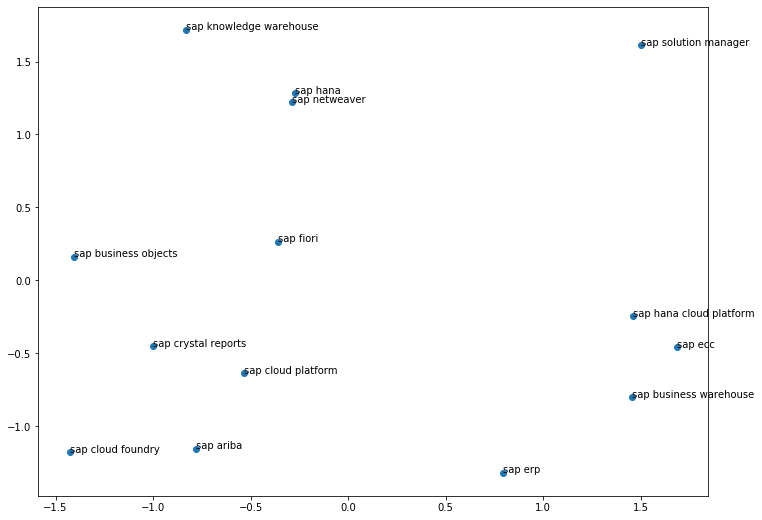

In [87]:
plot_nodes(terms, A)

IndexError: index 14 is out of bounds for axis 0 with size 14

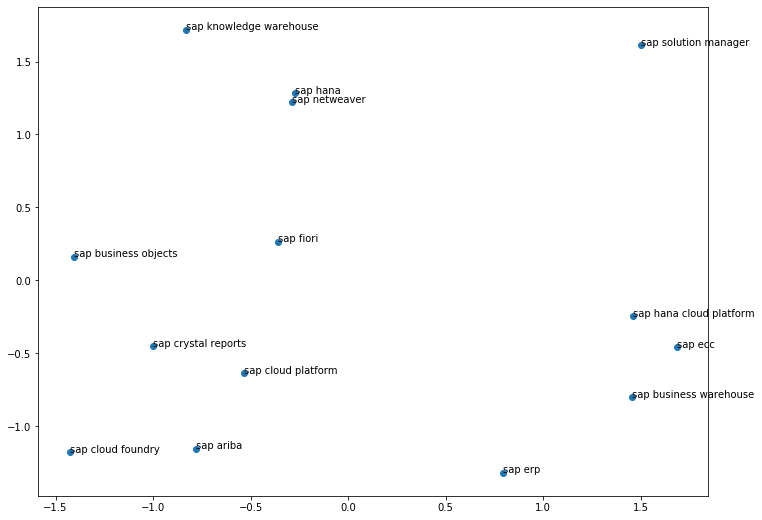

In [89]:
plot_nodes(terms, A)

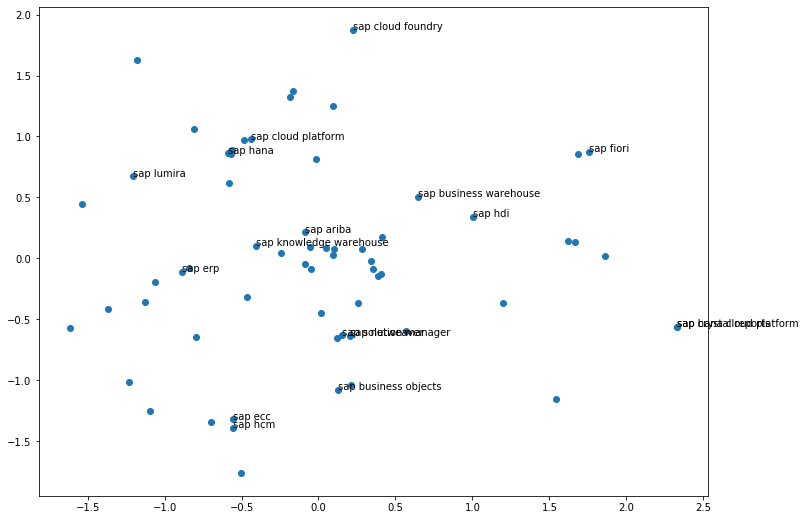

In [65]:
plot_nodes(terms, Y)

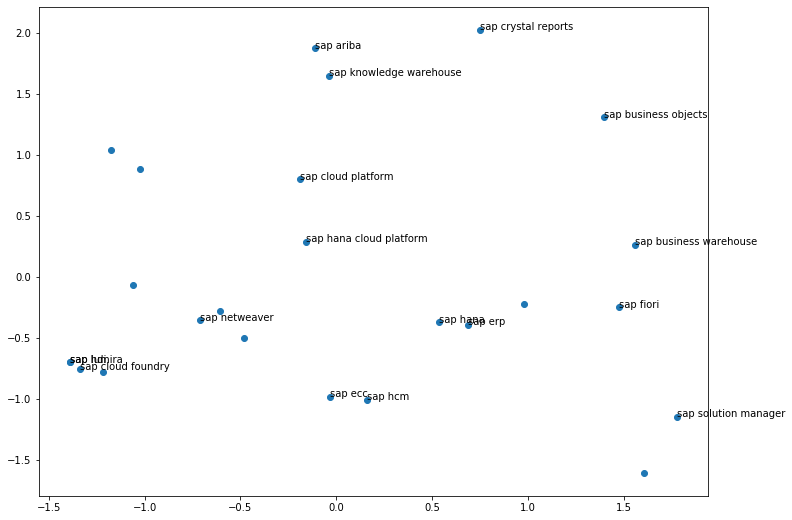

In [66]:
plot_nodes(terms, Z)

In [ ]:
------------------------------------ END OF CODE ---------------------------------------

# APPENDIX: Step by step code

In [ ]:
data = pd.read_csv(INPUT_FOLDER+input_file,sep=",",encoding="latin1").fillna(method='ffill')    
data.head(5)

In [ ]:
data_l = data.values.tolist()
data_l[:3]

In [ ]:
len(data_l)

In [ ]:
node_entities=[]
all_entities = []

for row in data_l:
    ent = row[1]
    ent = ent.replace("'","")
    ent = ent.replace("[","")
    ent = ent.replace("]","")
    ent = ent.replace(" sap","sap")
    ent_s = ent.split(',')
    #print(ent_s)
    
    ent_list =[]
    for e in ent_s:
        if len(e)>0:
            ent_list.append(e)
            all_entities.append(e)
        
    ent_list = sorted(set(ent_list))
    
    for i in ent_list:
        new_line =[]
        new_line.append(row[0])
        new_line.append(i)
        node_entities.append(new_line)

all_entities = sorted(set(all_entities))
             
print(len(node_entities))
print(node_entities)
print(len(all_entities))
print(all_entities)

# Appendix:

In [ ]:
def tag_values_tag2idx_idx2tag_tag2name(data):

    tags_vals = list(set(data["Tag"].values))

    # Add some additional tags:
    # X  tag for word piece support
    # [CLS] and [SEP] as BERT need
    tags_vals.append('X')
    tags_vals.append('[CLS]')
    tags_vals.append('[SEP]')
    tags_vals.append("PAD")

    tag2idx = {t: i for i, t in enumerate(tags_vals)}
    idx2tag = {i: t for i, t in enumerate(tags_vals) }

    print('tags_vals: ', tags_vals)
    print('tag2idx: ', tag2idx)
    print('idx2tag: ', idx2tag)

    tag_values = tags_vals
    
    # Mapping tag to name
    tag2name={tag2idx[key] : key for key in tag2idx.keys()}
    print('tag2name: ', tag2name)

    return tags_vals, tag_values, tag2idx, idx2tag, tag2name

In [ ]:
ent2idx = {t: i for i, t in enumerate(all_entities[:5])}
idx2ent = {i: t for i, t in enumerate(all_entities[:5]) }
tag2idx

In [ ]:
idx2ent = {i: t for i, t in enumerate(all_entities[:5]) }
idx2tag